# Experiment 1

In [13]:
with open("2020-phone/readings.csv") as f:
    rows = f.readlines()
    
period = 52
end = int(rows[1])
readings = [float(e) for e in rows[2:]]
timestamps = [end - ((len(readings) - e_id) * period / 1000) for e_id in range(len(readings)) ]

assert len(readings) == len(timestamps)
readings = list(zip(timestamps, readings))

readings[:5]

[(1674815804.324, 4.97),
 (1674815804.376, -26.75),
 (1674815804.428, 10.82),
 (1674815804.48, 14.51),
 (1674815804.532, 13.28)]

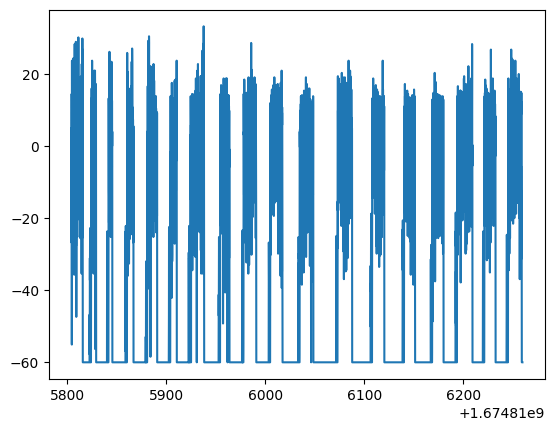

In [14]:
import matplotlib.pyplot as plt
plt.plot([e[0] for e in readings], [e[1] for e in readings])
plt.show()

In [15]:
delim_len = 100

def extract_parts(l, delim):
    indices = [i for i in range(len(l)) if len([e for e in l[i:i + delim_len] if e == delim]) == delim_len]

    # Collect each end-exclusive sublist bounded by each pair indices
    sublists = []
    for i in range(len(indices)-1):
        part = l[indices[i]+1:indices[i+1]]
        sublists.append(part)
    return sublists

In [16]:
chunks = extract_parts([e[1] for e in readings], min([e[1] for e in readings]))
chunks = [e for e in chunks if e != []]

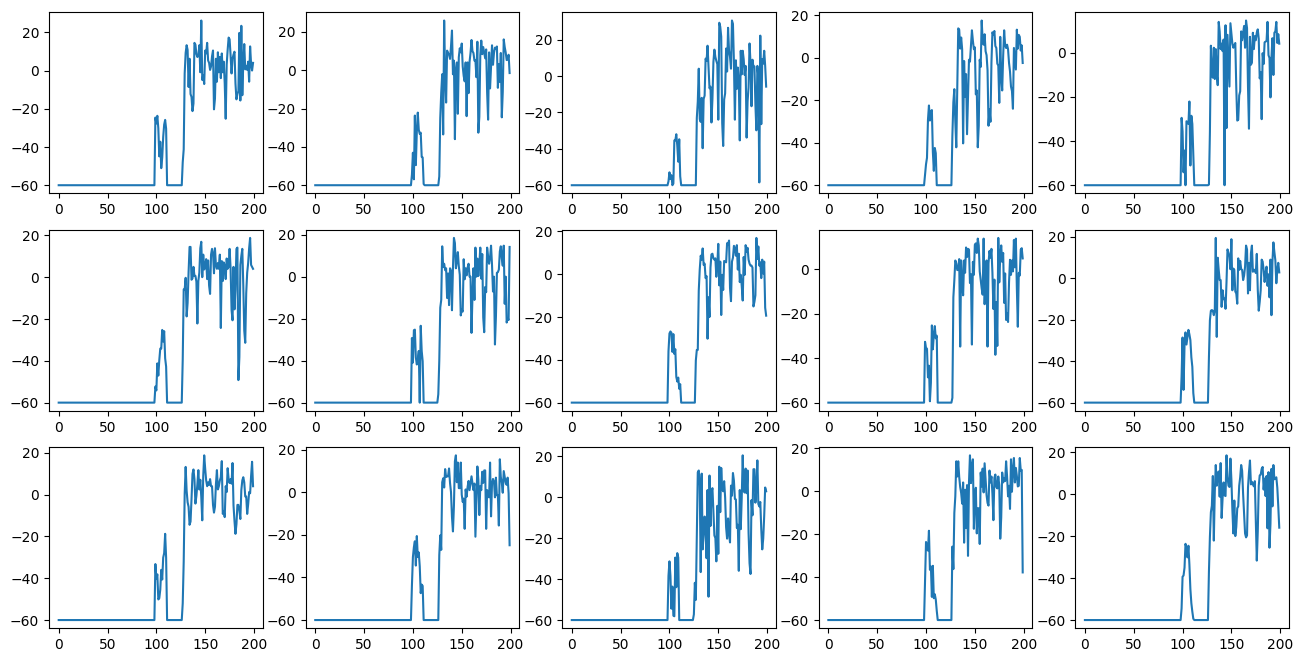

In [17]:
for i in range(1, 16):
    plt.subplot(3, 5, i)
    plt.plot(chunks[i][:delim_len + 100])

plt.gcf().set_size_inches(16, 8)
plt.show()

# Experiment 2

In [18]:
with open("55-phone/readings.csv") as f:
    raw = f.readlines()
    period = int(raw[0])
    timestamp = int(raw[1])
    data = [e.split(",") for e in raw[2:]]
    
    readings = [float(e[0]) for e in data]
    diffs = [int(e[1]) for e in data]
    timestamps = [timestamp + e for e in diffs]
    data = list(zip(timestamps, readings))
    
with open("55-phone/appliances.csv") as f:
    raw = f.readlines()
    raw = [e.split(",") for e in raw]
    timestamps = [int(e[0]) for e in raw]
    events = [e[1].strip() for e in raw]
    events = list(zip(timestamps, events))
    
data[:5], events[:5]

([(1675098583, 70.24),
  (1675098583, 75.78),
  (1675098583, 58.85),
  (1675098583, 72.39),
  (1675098583, 61.31)],
 [(1675098614, 'in'),
  (1675098623, 'out'),
  (1675098631, 'in'),
  (1675098641, 'out'),
  (1675098671, 'in')])

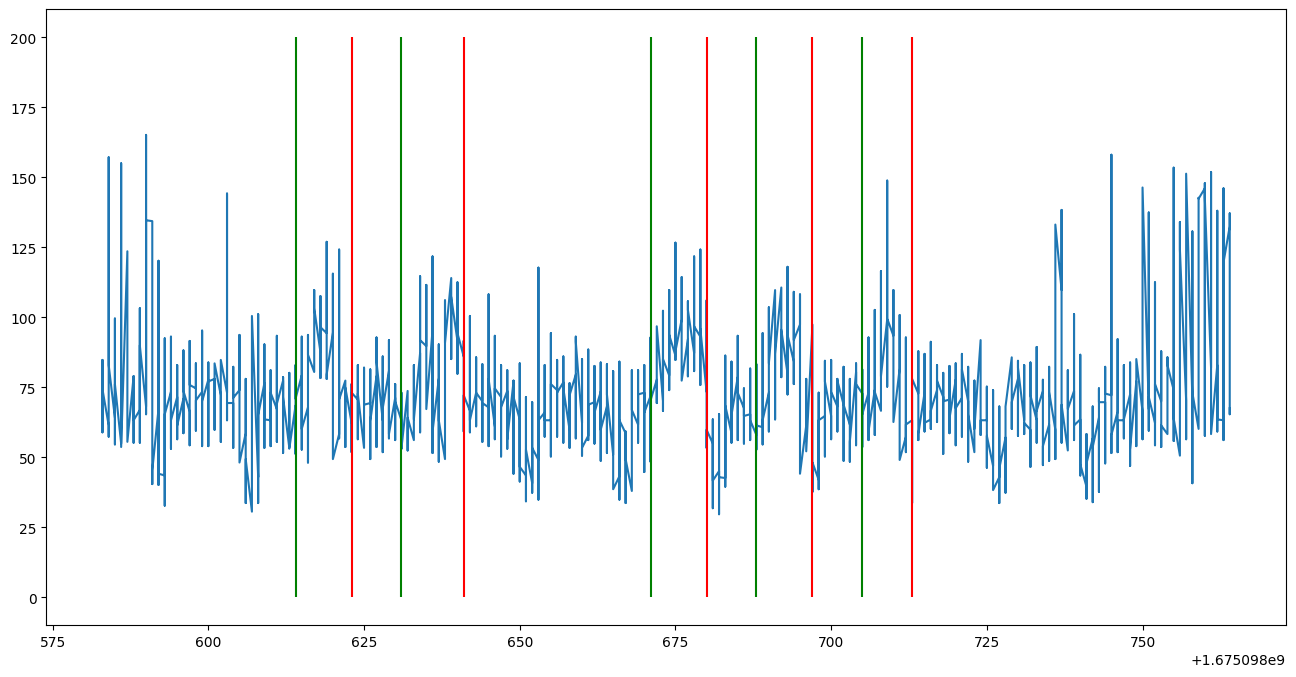

In [37]:
plt.gcf().set_size_inches(16, 8)
plt.plot([e[0] for e in data], [e[1] for e in data])
plt.vlines([e[0] for e in events if e[1] == "in"], 0, 200, colors="g")
plt.vlines([e[0] for e in events if e[1] == "out"], 0, 200, colors="r")
plt.show()

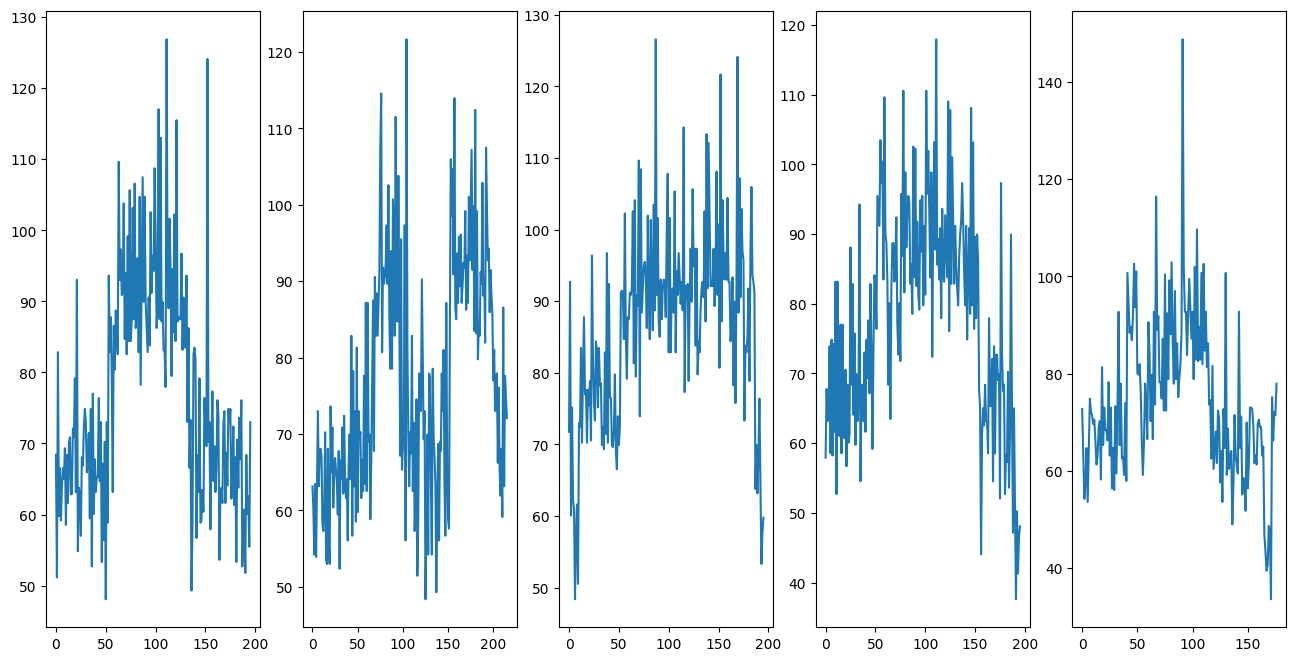

In [36]:
plt.gcf().set_size_inches(16, 8)

for e in range(5):
    plt.subplot(1, 5, e + 1)
    t_in = events[e * 2][0]
    t_out = events[e * 2 + 1][0]
    window = [e for e in data if e[0] > t_in - padding and e[0] < t_out + padding]
    plt.plot([e[1] for e in window])

# Experiment 3

In [41]:
with open("lamp-laptop/readings.csv") as f:
    raw = f.readlines()
    period = int(raw[0])
    timestamp = int(raw[1])
    data = [e.split(",") for e in raw[2:-1]]
    
    readings = [float(e[0]) for e in data]
    diffs = [int(e[1]) for e in data]
    timestamps = [timestamp + e for e in diffs]
    data = list(zip(timestamps, readings))
    
with open("lamp-laptop/appliances.csv") as f:
    raw = f.readlines()
    raw = [e.split(",") for e in raw]
    timestamps = [int(e[0]) for e in raw]
    events = [e[1].strip() for e in raw]
    events = list(zip(timestamps, events))
    
data[:5], events[:5]

([(1675101176, 45.3),
  (1675101176, 43.45),
  (1675101176, 45.61),
  (1675101176, 58.23),
  (1675101176, 44.99)],
 [(1675101070, 'i'),
  (1675101074, 'o'),
  (1675101080, 'i'),
  (1675101088, 'o'),
  (1675101097, 'i')])

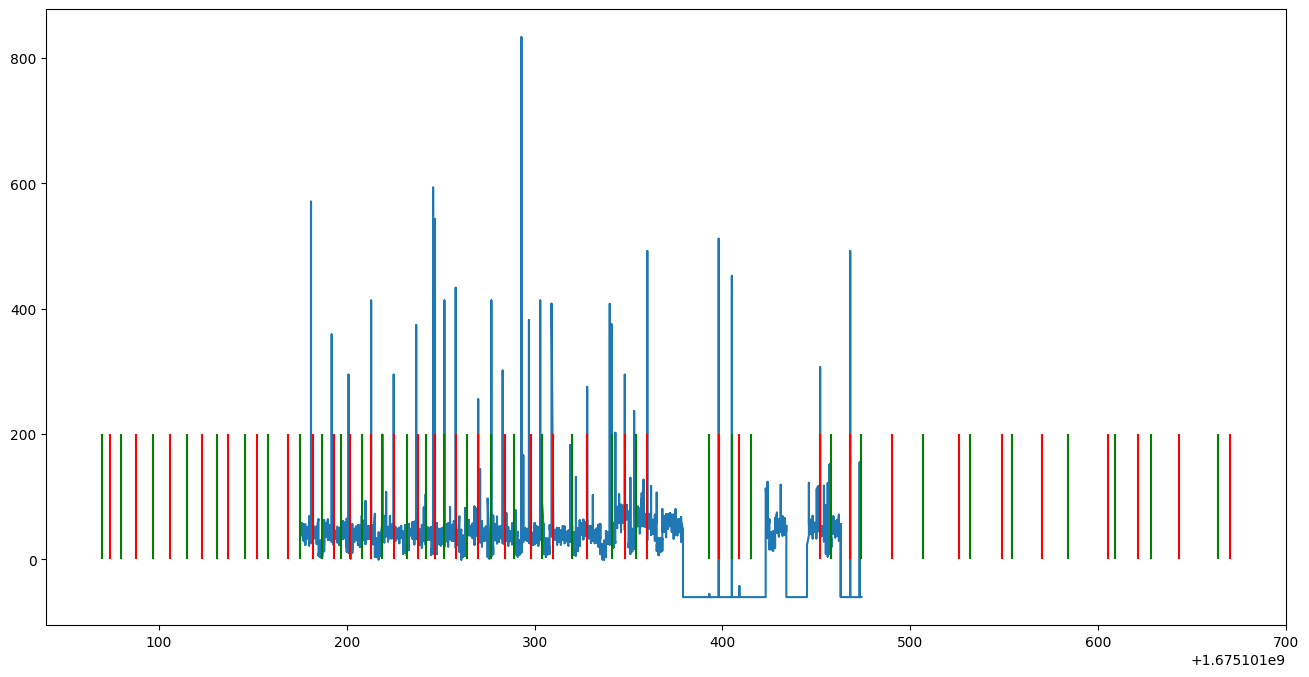

In [42]:
plt.gcf().set_size_inches(16, 8)
plt.plot([e[0] for e in data], [e[1] for e in data])
plt.vlines([e[0] for e in events if e[1] == "i"], 0, 200, colors="g")
plt.vlines([e[0] for e in events if e[1] == "o"], 0, 200, colors="r")
plt.show()

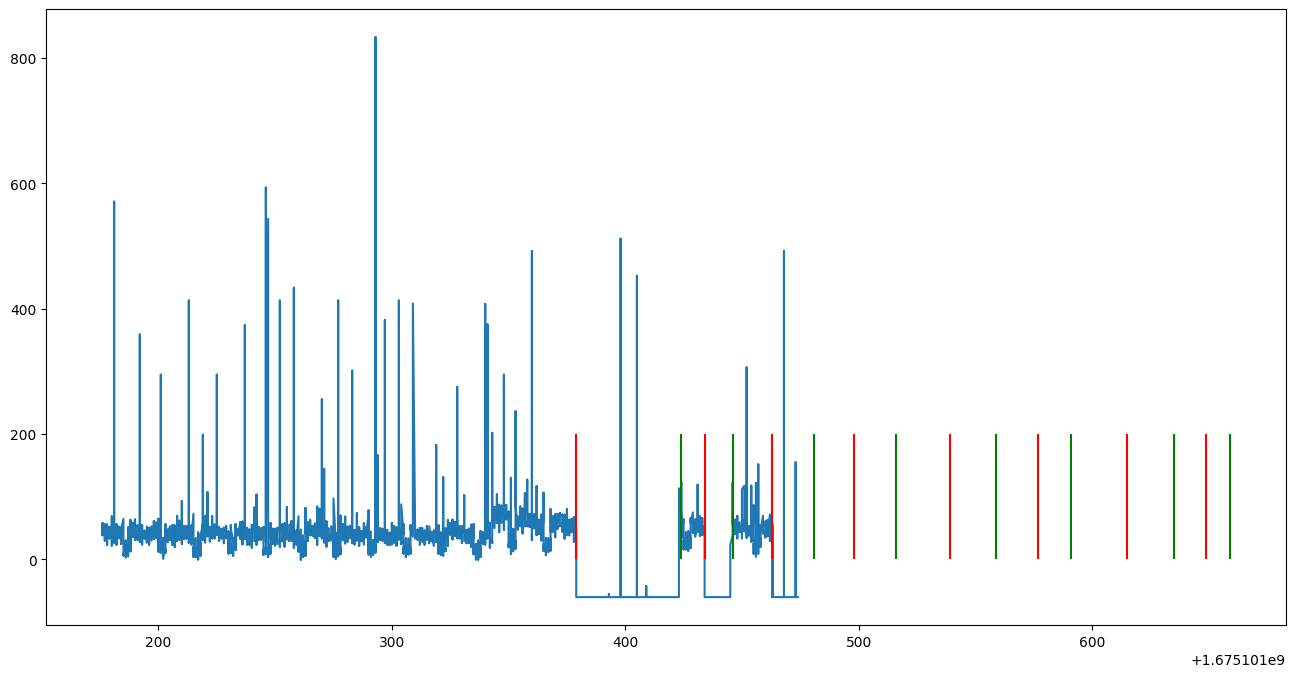

In [43]:
plt.gcf().set_size_inches(16, 8)
plt.plot([e[0] for e in data], [e[1] for e in data])
plt.vlines([e[0] for e in events if e[1] == "li"], 0, 200, colors="g")
plt.vlines([e[0] for e in events if e[1] == "lo"], 0, 200, colors="r")
plt.show()

In [ ]:
plt.gcf().set_size_inches(16, 8)

for e in range(5):
    plt.subplot(1, 5, e + 1)
    t_in = events[e * 2][0]
    t_out = events[e * 2 + 1][0]
    window = [e for e in data if e[0] > t_in - padding and e[0] < t_out + padding]
    plt.plot([e[1] for e in window])